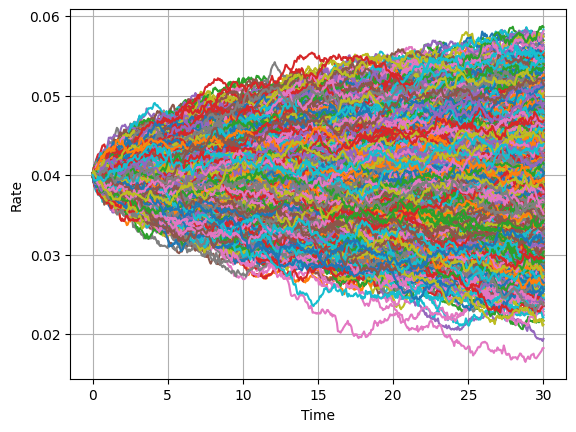

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sigma = .1

#differentiate zero coupon bond to get instantaneous forward rate 
def f0t(t,p0t):
    dt = .01
    derv = -(np.log(p0t(t+dt))- np.log(p0t(t-dt)))/(2*dt)
    return derv


#MC path generation using Ho Lee short rate dynamics 
def HoLeeMCPaths(noofpaths, noofsteps, T, p0t, sigma):

    r0 = f0t(.01,p0t)

    theta = lambda t : (f0t(t+dt,p0t) - f0t(t-dt,p0t))/2*dt + sigma**2*t       ##function of time


    w = np.zeros([noofpaths,noofsteps+1])
    r = np.zeros([noofpaths,noofsteps+1])
    m = np.zeros([noofpaths,noofsteps+1])
    
    k = np.random.normal(0,1,[noofpaths,noofsteps])

    time = np.zeros([noofsteps+1])

    r[:,0] = r0
    m[:,0] = 1
    
    dt = T/float(noofsteps)

    for i in range (0, noofsteps):
        k[:,i] = (k[:,i] - np.mean(k[:,i]))/np.std(k[:,i])*np.sqrt(dt)
        r[:,i+1] = r[:,i] + theta(time[i]) *dt + k[:,i] * sigma
        m[:,i+1] = m[:,i] * np.exp((r[:,i+1]+r[:,i])*.5 *dt)
        time[i+1] = time[i] + dt
        
    paths = {'rate':r, 'time': time, "moneysav": m}
    
    return paths

r = .04
t = 30

p0t = lambda t: np.exp(-r*t)

k = HoLeeMCPaths(10000, 500, 30, p0t, .001)


plt.figure(1)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Rate')
plt.plot(k['time'],np.transpose(k['rate']))
plt.show()



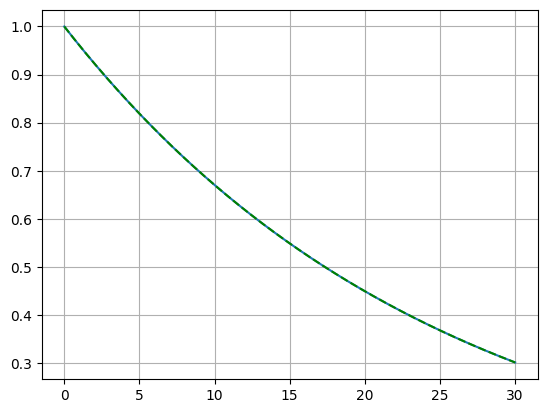

In [113]:
#zero coupon bonds term structure using simulated short rates

noofsteps = 500

p = k["moneysav"]

MS = np.zeros(noofsteps+1)
MS[0] = 1
for i in range (1,noofsteps+1):
    MS[i] = np.mean(1/p[:,i])
MS

#term structure of actual zero coupon bonds from market

p0t = lambda t: np.exp(-r*t)
pt = p0t(k["time"])

plt.figure(2)
plt.grid()
plt.plot(k["time"], pt)
plt.plot(k["time"], MS, '--g')
plt.show()